In [1]:
# Venus volcanoes recognizer inspired by LeNet5 and using Keras

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf 

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sklearn.linear_model import LogisticRegression


import keras 
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.optimizers import Adam

from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score



from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error


import seaborn as sns

Using TensorFlow backend.


In [3]:
X_train = pd.read_csv('train_images.csv', header=None, index_col=None)
X_test = pd.read_csv('test_images.csv', header=None, index_col=None)

Y_train = pd.read_csv('train_labels.csv')
Y_test = pd.read_csv('test_labels.csv')


In [4]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [5]:
Y_train.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [6]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(7000, 12100)
(2734, 12100)
(7000, 4)
(2734, 4)


In [7]:
#a lot of nan values for type, radius and number volcanoes for images with no volcano
Y_train.fillna(value=0,inplace=True)
Y_test.fillna(value=0,inplace=True)

In [8]:
print(sum(X_train.isna().sum()))
print(sum(X_test.isna().sum()))

print(Y_train.isna().sum())
print(Y_test.isna().sum())

0
0
Volcano?            0
Type                0
Radius              0
Number Volcanoes    0
dtype: int64
Volcano?            0
Type                0
Radius              0
Number Volcanoes    0
dtype: int64


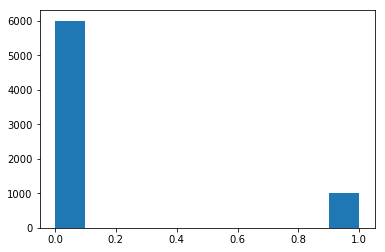

In [9]:
plt.hist(Y_train["Volcano?"])
plt.show()

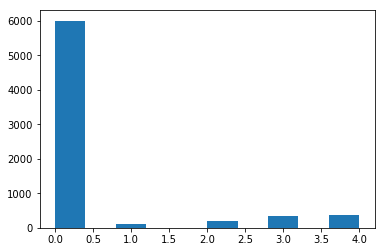

In [10]:
plt.hist(Y_train["Type"])
plt.show()

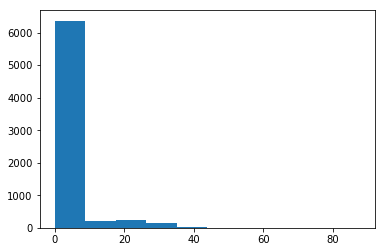

In [11]:
plt.hist(Y_train["Radius"])
plt.show()

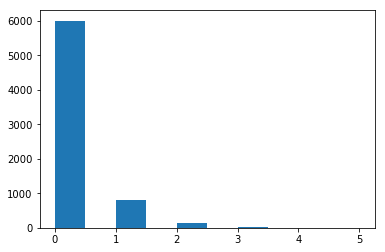

In [12]:
plt.hist(Y_train["Number Volcanoes"])
plt.show()

In [13]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [14]:
#Rescale data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.
X_test = X_test/255.
X_train[0].shape

(12100,)

In [15]:
#Reshape datasets for CNN
X_train_CNN = X_train.reshape(X_train.shape[0], 110, 110, 1)
X_test_CNN = X_test.reshape(X_test.shape[0], 110, 110, 1)

In [16]:
Y_train_volcano = Y_train['Volcano?']
Y_test_volcano = Y_test['Volcano?']

In [17]:
print (Y_train_volcano.shape)
print (Y_test_volcano.shape)

(7000,)
(2734,)


In [18]:
model = Sequential()

#Conv layer 1 
#input 32x32x1, output 28x28x6
model.add(Conv2D(32,(5,5), padding = 'Same', activation = 'relu', input_shape = (110,110,1)))
model.add(BatchNormalization())

#Pooling layer 1
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Conv layer 2
model.add(Conv2D(32, (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())

#Pooling layer 2
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())

#Fully connected layer 1
model.add(Dense(128, activation = 'relu'))

#Output Layer
model.add(Dense(units = 1,kernel_initializer="uniform", activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# Split the train dataset to training and  validation 

X_train_CNN, X_val_CNN, Y_train_volcano, Y_val_volcano = train_test_split(X_train_CNN, Y_train_volcano, test_size = 0.1, random_state=2)

In [20]:
#run model
model.fit(X_train_CNN, Y_train_volcano, batch_size=100, epochs = 15, validation_data=(X_val_CNN, Y_val_volcano))


Train on 6300 samples, validate on 700 samples
Epoch 1/15
6300/6300 [==============================] - 246s 39ms/step - loss: 0.6137 - acc: 0.8356 - val_loss: 1.0886 - val_acc: 0.8400
Epoch 2/15
6300/6300 [==============================] - 237s 38ms/step - loss: 0.2222 - acc: 0.9168 - val_loss: 0.1704 - val_acc: 0.9329
Epoch 3/15
6300/6300 [==============================] - 239s 38ms/step - loss: 0.1382 - acc: 0.9519 - val_loss: 0.4886 - val_acc: 0.8743
Epoch 4/15
6300/6300 [==============================] - 242s 38ms/step - loss: 0.0935 - acc: 0.9714 - val_loss: 0.1768 - val_acc: 0.9314
Epoch 5/15
6300/6300 [==============================] - 250s 40ms/step - loss: 0.0718 - acc: 0.9763 - val_loss: 0.1508 - val_acc: 0.9343
Epoch 6/15
6300/6300 [==============================] - 247s 39ms/step - loss: 0.0464 - acc: 0.9857 - val_loss: 0.1047 - val_acc: 0.9514
Epoch 7/15
6300/6300 [==============================] - 248s 39ms/step - loss: 0.0331 - acc: 0.9884 - val_loss: 0.5259 - val_acc: 0

In [21]:
Y_pred_volcano = model.predict_classes(X_test_CNN)

In [22]:
Y_pred_volcano = pd.DataFrame({'Volcano?': Y_pred_volcano.flatten()})
Y_test_volcano = pd.DataFrame({'Volcano?': Y_test_volcano})

test accuracy: 0.951353328456474 
precision: 0.936231884057971 
recall: 0.7442396313364056 
f1 score: 0.8292682926829268 


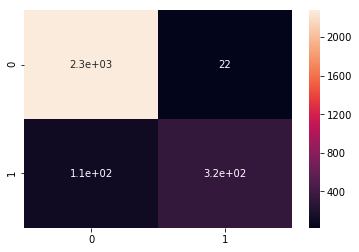

In [23]:
print ("test accuracy: %s " %accuracy_score(Y_test_volcano, Y_pred_volcano))
print ("precision: %s " %precision_score(Y_test_volcano, Y_pred_volcano))
print ("recall: %s " %recall_score(Y_test_volcano, Y_pred_volcano))
print ("f1 score: %s " %f1_score(Y_test_volcano, Y_pred_volcano))


cm = confusion_matrix(Y_test_volcano, Y_pred_volcano)
sns.heatmap(cm,annot=True)

In [24]:
#classification according to type 
#Take the old data before processing X_train for  CNN



X_train_new = X_train[Y_train['Volcano?']==1]
Y_train_clf_type = Y_train[Y_train['Volcano?']==1].drop(['Volcano?','Radius', 'Number Volcanoes'], axis=1)
Y_train_clf_type=np.array(Y_train_clf_type)

X_test_new = X_test[Y_pred_volcano['Volcano?']==1]
Y_test_clf_type = Y_test[Y_pred_volcano['Volcano?']==1].drop(['Volcano?','Radius','Number Volcanoes'], axis=1)
Y_test_clf_type=np.array(Y_test_clf_type)

# LogisticRegression 
logreg = LogisticRegression(C=5000, solver='newton-cg', multi_class='multinomial',max_iter=1000)
logreg.fit(X_train_new, Y_train_clf_type.ravel())
Y_pred_clf_type = logreg.predict(X_test_new)



/anaconda3/lib/python2.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python2.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [25]:
print ("score: %s " %logreg.score(X_train_new, Y_train_clf_type))
print ("accuracy score: %s " %accuracy_score(Y_test_clf_type, Y_pred_clf_type))

score: 1.0 
accuracy score: 0.4811594202898551 


In [26]:
Y_pred_clf_type = pd.DataFrame({'Type': Y_pred_clf_type})

In [27]:
Y_pred_type=[]
j=0
for i in range(Y_pred_volcano.shape[0]):
    if Y_pred_volcano['Volcano?'].iloc[i]==1.0:
        Y_pred_type.append(Y_pred_clf_type['Type'].iloc[j])
        j=j+1
    else:
        Y_pred_type.append(0.0)



Y_pred_type = pd.DataFrame({'Type': Y_pred_type})
Y_pred_type.head()

,Type
0,0.0
1,0.0
2,3.0
3,0.0
4,2.0


In [28]:
accuracy_score(Y_test['Type'], Y_pred_type)

0.8939283101682517

In [29]:
#classification according to number of volcanoes
#Take the old data before processing X_train for  CNN


Y_train_clf_num = Y_train[Y_train['Volcano?']==1].drop(['Volcano?','Radius','Type'], axis=1)
Y_train_clf_num=np.array(Y_train_clf_num)


Y_test_clf_num = Y_test[Y_pred_volcano['Volcano?']==1].drop(['Volcano?','Radius','Type'], axis=1)
Y_test_clf_num=np.array(Y_test_clf_num)

logreg = LogisticRegression(C=5000, solver='newton-cg', multi_class='multinomial',max_iter=10000)
logreg.fit(X_train_new, Y_train_clf_num.ravel())
Y_pred_clf_num = logreg.predict(X_test_new)



print ("score: %s " %logreg.score(X_train_new, Y_train_clf_num))
print ("accuracy score: %s " %accuracy_score(Y_test_clf_num, Y_pred_clf_num))

score: 1.0 
accuracy score: 0.7565217391304347 


/anaconda3/lib/python2.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [30]:
Y_pred_clf_num = pd.DataFrame({'Number Volcanoes': Y_pred_clf_num})

In [31]:
Y_pred_num=[]
j=0
for i in range(Y_pred_volcano.shape[0]):
    if Y_pred_volcano['Volcano?'].iloc[i]==1.0:
        Y_pred_num.append(Y_pred_clf_num['Number Volcanoes'].iloc[j])
        j=j+1
    else:
        Y_pred_num.append(0.0)



Y_pred_num = pd.DataFrame({'Number Volcanoes': Y_pred_num})
Y_pred_num.head()


accuracy_score(Y_test['Number Volcanoes'], Y_pred_num)

0.9286759326993417

In [32]:
#regression for radius 

Y_train_reg = Y_train[Y_train['Volcano?']==1].drop(['Volcano?','Type','Number Volcanoes'], axis=1)
Y_test_reg = Y_test[Y_pred_volcano['Volcano?']==1].drop(['Volcano?','Type','Number Volcanoes'], axis=1)
Y_train_reg=np.array(Y_train_reg)
Y_test_reg=np.array(Y_test_reg)

reg = GradientBoostingRegressor(random_state=20, n_estimators=500)
reg = reg.fit(X_train_new, Y_train_reg.ravel())


print (reg.score(X_train_new, Y_train_reg))

Y_pred_reg = reg.predict(X_test_new)
print (mean_squared_error(Y_test_reg, Y_pred_reg))

Y_pred_reg = pd.DataFrame({'Radius': Y_pred_reg})


0.9998761009377521
123.6796229920971


In [33]:
Y_pred_rad=[]
j=0
for i in range(Y_pred_volcano.shape[0]):
    if Y_pred_volcano['Volcano?'].iloc[i]==1.0:
        Y_pred_rad.append(Y_pred_reg['Radius'].iloc[j])
        j=j+1
    else:
        Y_pred_rad.append(0.0)

Y_pred_rad = pd.DataFrame({'Radius': Y_pred_rad})
Y_pred_rad.head()

,Radius
0,0.000000
1,0.000000
2,20.407059
3,0.000000
4,17.911743


In [34]:
Y_pred_volcano=Y_pred_volcano.join(Y_pred_type)
Y_pred_volcano=Y_pred_volcano.join(Y_pred_rad)
Y_pred_volcano=Y_pred_volcano.join(Y_pred_num)

In [40]:
Y_pred_volcano.head()

,Volcano?,Type,Radius,Number Volcanoes
0,0,0.0,0.000000,0.0
1,0,0.0,0.000000,0.0
2,1,3.0,20.407059,1.0
3,0,0.0,0.000000,0.0
4,1,2.0,17.911743,1.0


In [39]:
Y_test.head()

,Volcano?,Type,Radius,Number Volcanoes
0,0,0.0,0.00,0.0
1,0,0.0,0.00,0.0
2,1,1.0,17.00,1.0
3,0,0.0,0.00,0.0
4,1,3.0,15.13,1.0
